# CFLP

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#CFLP" data-toc-modified-id="CFLP-1.1">CFLP</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-environment-by-importing-libraries" data-toc-modified-id="Set-up-the-environment-by-importing-libraries-2.1">Set up the environment by importing libraries</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Case1.-Solving-CFLP-(Capacitated-Facility-Location-Problems)-with-synthetic-data" data-toc-modified-id="Case1.-Solving-CFLP-(Capacitated-Facility-Location-Problems)-with-synthetic-data-3.1">Case1. Solving CFLP (Capacitated Facility Location Problems) with synthetic data</a></span></li><li><span><a href="#Case2.-Solving-CFLP-(Capacitated-Facility-Location-Problems)-with-real-world-data" data-toc-modified-id="Case2.-Solving-CFLP-(Capacitated-Facility-Location-Problems)-with-real-world-data-3.2">Case2. Solving CFLP (Capacitated Facility Location Problems) with real-world data</a></span></li></ul></li></ul></div>

## Problem Description

### CFLP

The Capacitated Facility Location Problem<sup>[1]</sup> (CFLP) model is a method proposed to address the issue of selecting optimal locations for distribution centers with limited capacity and scale. The basic assumptions of the CFLP model are: (1) the capacity of the distribution centers is constrained, and the specific number of distribution nodes is known; (2) the fixed costs of the distribution centers remain constant; (3) the specific number of distribution centers is determined. The CFLP model selects the minimum number of end nodes that can serve the demands of all customer points while **minimizing the sum of fixed costs and transportation costs from the nodes to the customer points**. Firstly, under the premise of minimizing the total cost, the temporary logistics supply nodes of the enterprise are calculated. Secondly, the mobile distribution nodes within the logistics supply area are computed to minimize the total cost in the enterprise logistics supply region. When the total cost of the selected logistics distribution points shows a decreasing trend, the location calculation is considered complete; otherwise, the logistics distribution point must be moved to the next location within the selection range and the calculation is repeated until the total cost is minimized.

*Parameters*:
* ***I*** : Collection of demand point locations
* ***h<sub>i</sub>*** : Number of customers at point i
* ***P*** : Total number of facilities
* ***d<sub>ij</sub>*** : Distance between point i and point j

*Decision variables*:
$$
X_i= \begin{cases}1, & \text { Build facilities at point } i \\ 0, & \text { else }\end{cases}\\
Y_{i j}= \begin{cases}1, & \text { Assign point } i \text { to point } j  \\ 0, & \text { else }\end{cases}
$$

###  Integer programming model:
\begin{array}{lll}
\min & \sum_{i, j \in I} h_i d_{i j} Y_{i j} & (1)\\
\text { s.t. } & \sum_{i \in I} X_i=P, & (2)\\
& Y_{i j} \leq X_j,  \forall i, j \in I, & (3) \\
& \sum_{j \in I} Y_{i j}=1,  \forall i \in I, & (4)\\
& X_i, Y_{i j} \in\{0,1\}, \forall i, j \in I.  & (5)
\end{array}

[1] Davis P S, Ray T L. A branch‐bound algorithm for the capacitated facilities location problem[J]. Naval Research Logistics Quarterly, 1969, 16(3): 331-344.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib and Hispot libraries to set up an environment

In [1]:
import random
import numpy as np
from pulp import *
import matplotlib.pyplot as plt
from hispot.FLP import CFLP

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open source linear programming solvers, such as `CBC` and `GLPK`; in addition, it also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`.
The default is CBC, and PuLP will be installed by default. For most problems, the CBC open source solver from COIN-OR will suffice.
You can use `listSolvers(onlyAvailable=True)` to check the available solvers.

In [2]:
np.random.seed(0) # random seed
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

['CPLEX_CMD', 'GUROBI_CMD', 'PULP_CBC_CMD']


## Example

In this part, we will input synthetic data and real-world data and display them as two examples to represent random cases and real-world scenarios, respectively.

### Case1. Solving CFLP (Capacitated Facility Location Problems) with synthetic data

Generate problem with synthetic data

In [3]:
num_points = 20
num_located = 4  # P: number of located facility in the end
# np.random.seed(0)
cost = np.random.randint(1, 10, size=num_points)  # c
demand = np.random.randint(1, 2, size=num_points)  # d
capacity = np.random.randint(80, size=num_points)  # C
points = [(random.random(), random.random()) for i in range(num_points)]
points_np = np.array(points)

In [4]:
%%time
centers, assigns, obj = CFLP(cost=cost,
                             num_points=num_points,
                             points=points_np,
                             solver=PULP_CBC_CMD(),
                             num_located=num_located,
                             demand=demand,
                             capacity=capacity).prob_solve()

Status: Optimal
Centers = [1, 7, 13, 18]
Assigned relationships =  {1: [6, 11, 15], 7: [8], 13: [2, 3, 5, 16, 17, 19], 18: [0, 4, 9, 10, 12, 14]}
Minimum total cost =  13.030692632424396
CPU times: total: 15.6 ms
Wall time: 63 ms


Visualize optimal solution

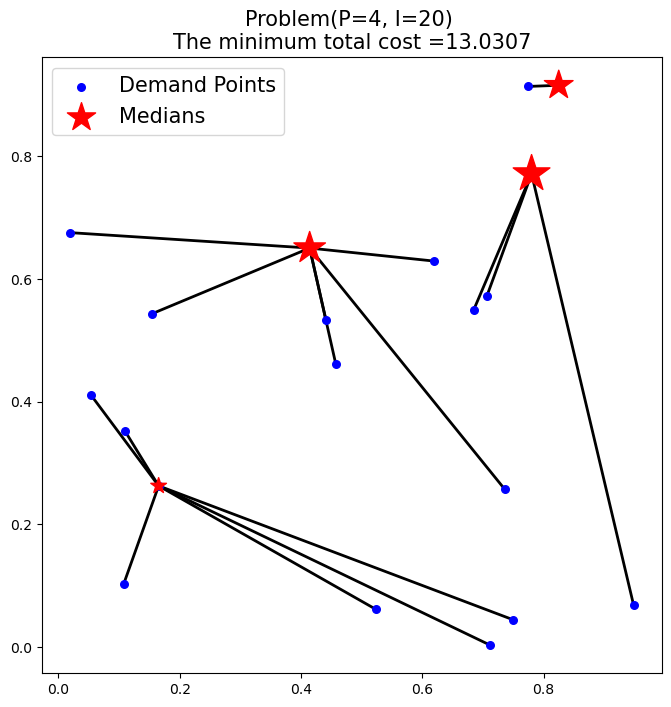

In [5]:
plt.figure(figsize=(8,8))
name = 'Problem(P=' + str(num_located) + ', I=' + str(num_points) + ') \nThe minimum total cost =' + str(round(obj,4))
plt.title(name, fontsize = 15)

#Points
plt.scatter(*zip(*points_np), c='Blue', marker='o',s=30, label = 'Demand Points', zorder=2)
plt.scatter(*zip(*points_np[centers]), c='Red', marker='*',s=10*capacity[centers] ,label = 'Medians',zorder=3)
#Lines
for i in assigns:
    center_point = points_np[i]
    for j in assigns[i]:
        demand_points = points_np[j]
        pts = [points[i], points[j]]
        plt.plot(*zip(*pts), c='Black', linewidth=2, zorder=1)
# plt.grid(True)   
plt.legend(loc='best', fontsize = 15) 
plt.show()

### Case2. Solving CFLP (Capacitated Facility Location Problems) with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [6]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt

We select Xicheng District of Beijing the study area and read partial poi points in Xicheng District.

In [7]:
%%time
region=gpd.read_file("../data/beijing/xicheng/xicheng.shp")
region.head(2)

CPU times: total: 0 ns
Wall time: 10.4 ms


,Name,Layer,geometry
0,牛街街道,乡镇,"POLYGON ((116.35744 39.88798, 116.36069 39.887..."
1,西长安街街道,乡镇,"POLYGON ((116.37223 39.89854, 116.36903 39.898..."


Partial POI data in Xicheng district

In [8]:
%%time
poi = gpd.read_file("../data/beijing/xicheng/xicheng-poi.shp")
poi.shape[0]

CPU times: total: 0 ns
Wall time: 6.83 ms


24

In [9]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

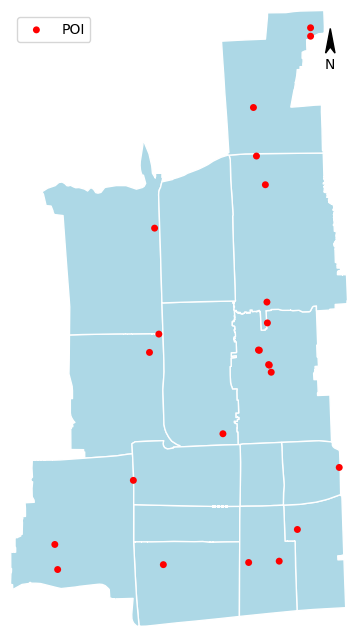

In [12]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="lightblue",
                   figsize=(10, 8))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='red',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)

Generate problem with real-world data

In [13]:
data = poi[['lon', 'lat']]
num_points = poi.shape[0]
num_located = 10
points = [(data['lon'][i], data['lat'][i]) for i in range(num_points)]
points_np = np.array(points)
cost = np.random.randint(10, size=num_points)  # c
demand = np.random.randint(1, 2, size=num_points)  # d
capacity = np.random.randint(80, size=num_points)  # C

Output optimal solution

In [14]:
centers, assigns, obj = CFLP(cost=cost,
                             num_points=num_points,
                             points=points_np,
                             solver=PULP_CBC_CMD(),
                             num_located=num_located,
                             demand=demand,
                             capacity=capacity).prob_solve()

Status: Optimal
Centers = [2, 3, 5, 6, 7, 14, 15, 18, 19, 23]
Assigned relationships =  {2: [], 3: [0, 4, 11, 13, 16], 5: [12], 6: [22], 7: [17, 21], 14: [], 15: [1, 8, 20], 18: [2, 9], 19: [10], 23: []}
Minimum total cost =  17.166512922809588


In [15]:
from shapely.geometry import LineString
crs = 'EPSG:4326'
lines = gpd.GeoDataFrame(columns=['id', 'geometry'], crs=crs)
k = 0
for i in assigns:
    center = points_np[i]
    for j in assigns[i]:
        assign = points_np[j]
        line = LineString([center, assign])
        lines.loc[k] = [k+1, line]
        k = k+1
center_points = poi.iloc[centers]

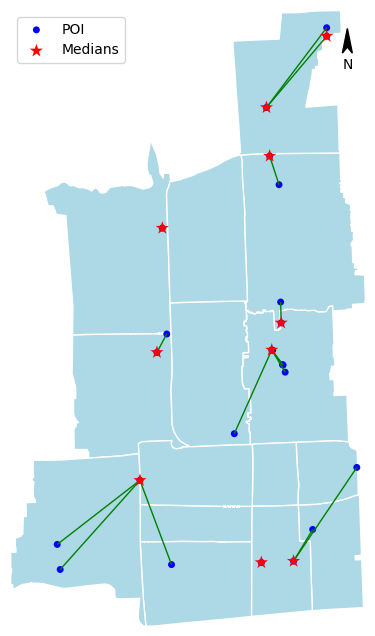

In [16]:
ax = gplt.sankey(lines, 
                 projection=gcrs.Mollweide(),
                 linewidth=1,
                 color='green',
                 zorder=3,
                 figsize=(10, 8),)
gplt.polyplot(region,
              projection=gcrs.AlbersEqualArea(),
              edgecolor="white", 
              facecolor="lightblue",
              zorder=1,
              ax=ax,)
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='blue',
               alpha=1,
               linewidth=0,
               label='POI',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points, 
               extent=region.total_bounds,
               s=10,
               color='red',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Medians',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='upper left')